# Linear Methods for Regression & Classification

Table of contents

Chapter 1.   Linear regression

✔ Chapter 2.   Logistic regression

Chapter 3.   Naive bayes

To install further python libraries, type

`!pip install --target=$my_path [LIBRARY_NAME]`

# Chapter 2-1. **[Logistic Regression]** Implement from scratch


In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Step1: Define sigmoid function

In [7]:
def sigmoid(self, x):
  sig_x = (1/(1+np.exp(-x)))

  return sig_x

## Step2: Define log likelihood function

In [8]:
def log_likelihood(self, y_true, y_pred):

  # To avoid log 0 case, use some small value (e.g., 1e-7)
  y_pred = np.maximum(np.full(y_pred.shape, self.eps), np.minimum(np.full(y_pred.shape, 1-self.eps), y_pred))

  likelihood = sum(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))


  return likelihood

## Step3: Gradient ascent

In [9]:
def gradient_ascent(self, X, y, y_pred):
  gradient = np.mean((y-y_pred)*X.T, axis=1)

  # update beta and beta_0
  # gradient ASCENT not descent (+ instead of -)
  self.weights = self.weights + self.learning_rate*gradient

In [10]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        # Initialising parameters
        self.learning_rate  = learning_rate
        self.max_iterations = max_iterations
        self.likelihoods    = []

        #  epsilon so log(0) is not defined
        self.eps = 1e-7



    def fit(self, X, y):

        num_examples = X.shape[0]
        num_features = X.shape[1]

        # initialize weights
        self.weights = np.zeros(num_features)


        # gradient ascent
        for i in range(self.max_iterations):
            # hypothesis
            z = np.dot(X,self.weights)
            # appplying sigmoid on z
            h = sigmoid(self, z)

            gradient_ascent(self, X, y, h)

            # log likelihood
            likelihood = log_likelihood(self, y, h)

            self.likelihoods.append(likelihood)

    def predict(self, X, threshold=0.5):
        # apply threshold to determine the predication class
        predictions = np.array(list(map(lambda x: 1 if x>threshold else 0, self.predict_proba(X))))

        return predictions

    def predict_proba(self,X):
        '''Predict probabilities for given X.
        Remember sigmoid returns value between 0 and 1.
        Args:
            X : Numpy array (num_samples, num_features)
        Returns:
            probabilities: Numpy array (num_samples,)
        '''
        if self.weights is None:
            raise Exception("Fit the model before prediction")

        # get prediction using weights learned thru gradient ascent
        z = np.dot(X,self.weights)
        # apply sigmoid so probabilities are between 0 and 1
        probabilities = sigmoid(self, z)


        return probabilities


In [11]:
!wget https://github.com/DeepConnectAI/challenge-week-3/raw/master/data/divorce.csv


--2023-10-03 15:01:24--  https://github.com/DeepConnectAI/challenge-week-3/raw/master/data/divorce.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DeepConnectAI/challenge-week-3/master/data/divorce.csv [following]
--2023-10-03 15:01:25--  https://raw.githubusercontent.com/DeepConnectAI/challenge-week-3/master/data/divorce.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19021 (19K) [text/plain]
Saving to: ‘divorce.csv.1’

divorce.csv.1       100%[===================>]  18.58K  --.-KB/s    in 0s      

2023-10-03 15:01:25 (55.2 MB/s) - ‘divorce.csv.1’ saved [19021/19021]



Load data


*   data source: https://www.kaggle.com/datasets/adisak/divorce-predictors-data-set-csv
*   54 attributes about divorce-related questions and 0-4 scale
*   Label: Potential divorce, health marriage



In [12]:
data = pd.read_csv("divorce.csv", delimiter = ';')

df = pd.DataFrame(data)
df.head()



,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [13]:
print(data.shape)

(170, 55)


In [14]:
value = [1]*170
#inserting a intecept so x for beta_0
df = df.insert(0,"Atr0",value, False)

In [15]:
from sklearn.model_selection import train_test_split


x = data.iloc[: , :-1]
y = data.iloc[: , -1]
x = np.array(x)
y = np.array(y)

#Split the dataset (15% portion goes to testing set and use random seed=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.15, random_state=0)


In [16]:
model = MyLogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

def accuracy(y_true,y_pred):

    count=0
    y_cap = y_pred - y_true
    count = np.count_nonzero(y_cap==0)
    accuracy = (count/len(y_pred))*100
    print(accuracy)

accuracy(y_test,y_pred)

88.46153846153845


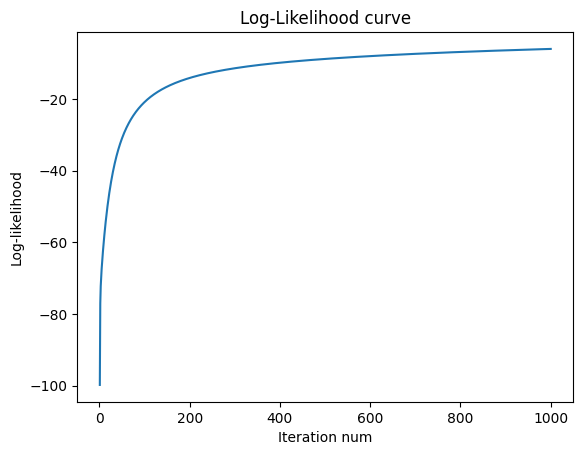

In [17]:
plt.plot([i+1 for i in range(len(model.likelihoods))], model.likelihoods)
plt.title("Log-Likelihood curve")
plt.xlabel("Iteration num")
plt.ylabel("Log-likelihood")
plt.show()

# Chapter 2-2. **[Logistic Regression]** Use scikit-learn library


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression(random_state=0).fit(x, y) # By default, it uses L2 regularization

In [20]:
clf.predict(x_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1])

In [21]:
clf.predict_proba(x_test)

array([[9.92909916e-01, 7.09008403e-03],
       [9.93793392e-01, 6.20660759e-03],
       [9.82234976e-01, 1.77650239e-02],
       [8.16020584e-10, 9.99999999e-01],
       [2.03972106e-09, 9.99999998e-01],
       [9.89224873e-01, 1.07751272e-02],
       [5.61493589e-06, 9.99994385e-01],
       [9.99541078e-01, 4.58921756e-04],
       [9.96305895e-01, 3.69410459e-03],
       [9.99222079e-01, 7.77921121e-04],
       [9.93074632e-01, 6.92536778e-03],
       [1.25028874e-01, 8.74971126e-01],
       [1.28656057e-05, 9.99987134e-01],
       [9.98127810e-01, 1.87218975e-03],
       [1.27564181e-09, 9.99999999e-01],
       [4.62072602e-11, 1.00000000e+00],
       [2.79639711e-09, 9.99999997e-01],
       [9.98354828e-01, 1.64517168e-03],
       [1.87215621e-09, 9.99999998e-01],
       [1.87215621e-09, 9.99999998e-01],
       [9.73714712e-01, 2.62852878e-02],
       [1.60487034e-01, 8.39512966e-01],
       [9.99533109e-01, 4.66890939e-04],
       [9.93453704e-01, 6.54629594e-03],
       [9.936551

In [22]:
clf.score(x_test,y_test) #accuracy

1.0

In [23]:
print(clf.coef_)

[[ 1.93496181e-05  2.67985565e-01  2.82670780e-01  3.51251701e-01
   1.40311656e-01  1.60821772e-01  3.28223721e-01 -7.70116016e-04
   7.73421958e-02  9.34445840e-02 -4.39149750e-02  1.35216625e-01
   1.52007646e-01 -8.87513891e-02  2.06023885e-01  3.02886317e-01
   1.49462450e-01  3.57800694e-01  2.98800359e-01  2.77647234e-01
   3.05884674e-01  9.59785055e-02 -2.47195021e-02 -3.40149783e-02
  -6.90561691e-02  1.48278641e-01  4.92940337e-01  1.15749097e-01
   3.36929534e-01  1.89327204e-01  2.07870414e-01  3.67207411e-01
   1.82470382e-01  1.96401791e-01  2.02473626e-01  6.88879415e-02
   2.04710881e-01  2.74333013e-02  2.07476513e-01  3.09426907e-01
   5.95899712e-01  2.24699201e-01  1.61095488e-01  1.50263254e-01
   3.72372650e-01  1.30133145e-02  4.70398006e-02  6.55913015e-02
  -7.20112889e-02  4.57934833e-01  1.81410282e-01 -5.16203209e-03
   2.46520713e-01  3.01556275e-01 -5.23308037e-02]]
